# Task
 To Generate a simple dataset for binary classification with columns 'study_hours', 'playing_hours', and 'pass_fail'. Perform binary classification using logistic regression on this dataset. Split the data, train the model, and evaluate its performance using MSE, MAE, RMSE, and R-squared.

## Generate a simple dataset

### Subtask:
Create a synthetic dataset with columns for 'study_hours', 'playing_hours', and 'pass_fail' (the target variable).


**Reasoning**:
The first step is to import the necessary libraries and generate the synthetic data according to the instructions.



In [1]:
import numpy as np
import pandas as pd

# Set the number of data points
n_samples = 1000 # Increased number of samples

# Generate study_hours (between 1 and 10)
np.random.seed(42) # for reproducibility
study_hours = np.random.uniform(1, 10, n_samples)

# Generate playing_hours (between 0 and 8), with some inverse correlation to study_hours
# Adjusted the correlation and added more noise for variability
playing_hours = 8 - (study_hours * 0.6) + np.random.normal(0, 2, n_samples)
playing_hours = np.clip(playing_hours, 0, 8) # ensure values are within the range

# Create pass_fail based on a more logical rule: pass if study_hours is significantly higher than playing_hours, with some noise
# Adjusted the rule to better reflect the desired outcome
pass_fail_probability = 1 / (1 + np.exp(-(study_hours * 0.8 - playing_hours * 0.7 - 1))) # Using a sigmoid-like function for probability
pass_fail = (np.random.rand(n_samples) < pass_fail_probability).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    'study_hours': study_hours,
    'playing_hours': playing_hours,
    'pass_fail': pass_fail
})

# Display the first few rows
display(df.head())

,study_hours,playing_hours,pass_fail
0,4.370861,5.732885,0
1,9.556429,0.000000,1
2,7.587945,4.207628,1
3,6.387926,5.388416,1
4,2.404168,7.677080,0


## Split the dataset

### Subtask:
Split the generated dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [2]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['study_hours', 'playing_hours']]
y = df['pass_fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the split data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (750, 2)
Shape of X_test: (250, 2)
Shape of y_train: (750,)
Shape of y_test: (250,)


## Implement logistic regression

### Subtask:
Build and train a logistic regression model using the training data.


**Reasoning**:
Import the LogisticRegression class, instantiate the model, and train it using the training data.



In [3]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate the model

### Subtask:
Predict on the test data and evaluate the model's performance using metrics like MSE, MAE, RMSE, and R-squared.


**Reasoning**:
Import the necessary metrics from sklearn.



In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Reasoning**:
Predict on the test data and calculate the evaluation metrics.



In [5]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.1120
Mean Absolute Error (MAE): 0.1120
Root Mean Squared Error (RMSE): 0.3347
R-squared (R2) Score: 0.5478


## Visualize the results

### Subtask:
Create visualizations to help understand the data and the model's performance.


**Reasoning**:
Import the necessary plotting library.



In [6]:
import matplotlib.pyplot as plt

**Reasoning**:
Visualize the generated data to understand the relationship between study hours, playing hours, and the pass/fail outcome.

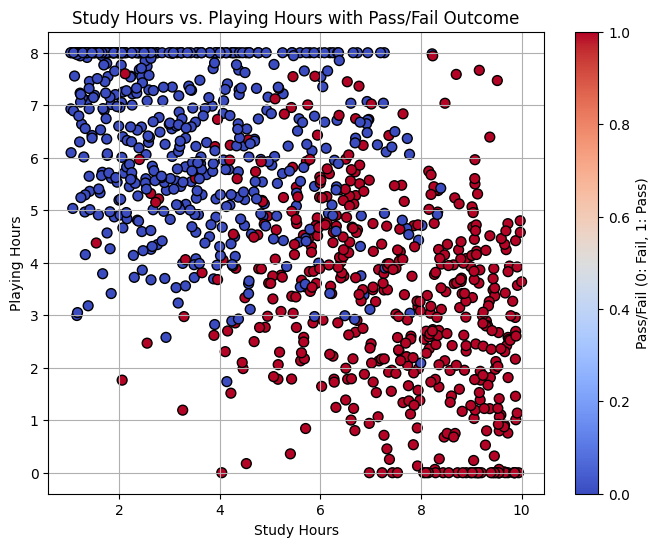

In [7]:
# Visualize the generated data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['study_hours'], df['playing_hours'], c=df['pass_fail'], cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel('Study Hours')
plt.ylabel('Playing Hours')
plt.title('Study Hours vs. Playing Hours with Pass/Fail Outcome')
plt.colorbar(scatter, label='Pass/Fail (0: Fail, 1: Pass)')
plt.grid(True)
plt.show()

## Visualize the Model's Decision Boundary

### Subtask:
Visualize the decision boundary of the trained logistic regression model on the test data.

**Reasoning**:
To visualize the decision boundary, we need to create a meshgrid of points across the feature space and predict the class for each point using the trained model. We can then plot the test data points and the decision boundary.

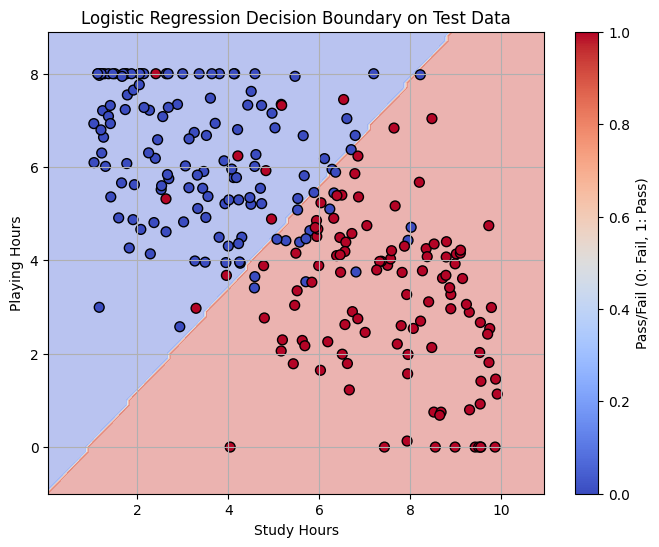

In [8]:
# Visualize the decision boundary
plt.figure(figsize=(8, 6))

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X['study_hours'].min() - 1, X['study_hours'].max() + 1
y_min, y_max = X['playing_hours'].min() - 1, X['playing_hours'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
# Convert the meshgrid points to a DataFrame with the same column names as X_train
meshgrid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_train.columns)
Z = model.predict(meshgrid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Plot the test data points
scatter = plt.scatter(X_test['study_hours'], X_test['playing_hours'], c=y_test, cmap='coolwarm', edgecolors='k', s=50)

plt.xlabel('Study Hours')
plt.ylabel('Playing Hours')
plt.title('Logistic Regression Decision Boundary on Test Data')
plt.colorbar(scatter, label='Pass/Fail (0: Fail, 1: Pass)')
plt.grid(True)
plt.show()

The decision boundary is like a line or curve that the model uses to separate different categories of data. In this case, it shows where the model decides whether a data point belongs to one class or the other.

## Make Predictions with User Input

### Subtask:
Take user input for 'study_hours' and 'playing_hours' and predict the 'pass_fail' outcome using the trained logistic regression model.

**Reasoning**:
Get user input for the two features, create a DataFrame with the same structure as the training data, and use the trained model to make a prediction.

In [9]:
# Get user input
study_hours_input = float(input("Enter the number of study hours: "))
playing_hours_input = float(input("Enter the number of playing hours: "))

# Create a DataFrame for the input
user_input_df = pd.DataFrame([[study_hours_input, playing_hours_input]], columns=['study_hours', 'playing_hours'])

# Make a prediction
predicted_outcome = model.predict(user_input_df)

# Display the result
if predicted_outcome[0] == 1:
    print(f"\nBased on {study_hours_input} study hours and {playing_hours_input} playing hours, the model predicts a: Pass")
else:
    print(f"\nBased on {study_hours_input} study hours and {playing_hours_input} playing hours, the model predicts a: Fail")

Enter the number of study hours: 5
Enter the number of playing hours: 6

Based on 5.0 study hours and 6.0 playing hours, the model predicts a: Fail


## Decision Boundary Criteria

### Subtask:
Calculate and display the equation of the decision boundary based on the trained logistic regression model.

**Reasoning**:
The decision boundary for a logistic regression model with two features (study_hours and playing_hours) is a line defined by the equation:
`coefficient_study_hours * study_hours + coefficient_playing_hours * playing_hours + intercept = 0`
We can rearrange this equation to express 'playing_hours' in terms of 'study_hours' to get the slope and intercept of the decision boundary line for visualization purposes.

In [10]:
# Get the coefficients and intercept from the trained model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# The decision boundary is defined by:
# coef_study * study_hours + coef_playing * playing_hours + intercept = 0
# We can rearrange this to find playing_hours in terms of study_hours:
# playing_hours = (-coef_study / coef_playing) * study_hours - (intercept / coef_playing)

coef_study = coefficients[0]
coef_playing = coefficients[1]

# Calculate the slope and intercept of the decision boundary line
# Handle the case where coef_playing is zero to avoid division by zero
if coef_playing != 0:
    slope = -coef_study / coef_playing
    intercept_boundary = -intercept / coef_playing

    print(f"The decision boundary equation is approximately:")
    print(f"{coef_study:.4f} * study_hours + {coef_playing:.4f} * playing_hours + {intercept:.4f} = 0")
    print(f"\nRearranged to solve for playing_hours:")
    print(f"playing_hours = {slope:.4f} * study_hours + {intercept_boundary:.4f}")

    # You can use this equation to understand the trade-off between study and playing hours
    # A point (study_hours, playing_hours) on this line has an equal probability of being classified as Pass or Fail.
    # Points above the line will be classified as one class, and points below as the other.

else:
    print("The coefficient for playing_hours is zero, resulting in a vertical decision boundary.")
    print(f"The decision boundary is approximately at study_hours = {-intercept / coef_study:.4f}")

The decision boundary equation is approximately:
0.8081 * study_hours + -0.7253 * playing_hours + -0.7586 = 0

Rearranged to solve for playing_hours:
playing_hours = 1.1141 * study_hours + -1.0459


## Decision Boundary Criteria

### Subtask:
Calculate and display the equation of the decision boundary based on the trained logistic regression model.

**Reasoning**:
The decision boundary for a logistic regression model with two features (study_hours and playing_hours) is a line defined by the equation:
`coefficient_study_hours * study_hours + coefficient_playing_hours * playing_hours + intercept = 0`
We can rearrange this equation to express 'playing_hours' in terms of 'study_hours' to get the slope and intercept of the decision boundary line for visualization purposes.

## Visualize the Model's Decision Boundary

### Subtask:
Visualize the decision boundary of the trained logistic regression model on the test data.

**Reasoning**:
To visualize the decision boundary, we need to create a meshgrid of points across the feature space and predict the class for each point using the trained model. We can then plot the test data points and the decision boundary.

## Export Dataset to CSV

### Subtask:
Export the generated dataset DataFrame to a CSV file.

**Reasoning**:
Save the `df` DataFrame to a CSV file named 'classification_dataset.csv' for later use or analysis.

In [11]:
# Export the DataFrame to a CSV file
df.to_csv('classification_dataset.csv', index=False)

print("Dataset exported to classification_dataset.csv")

Dataset exported to classification_dataset.csv
